In [32]:
import numpy as np
import re
from matplotlib import pyplot as plt
%matplotlib inline
import random

In [33]:
#To take file input.txt as input .
f = open('input.txt', 'r')
ds = f.read()
f.close()

In [34]:
# ds.index('A STUDY IN SCARLET') returns 2525 we start from there. Length has been taken as 50000 . data has been 
#created by removing '\n' and stripping it off whitespaces . (Data preprocessing)
start = 2525
length = 50000
data = ' '.join([ix.strip() for ix in ds[start:start+length].split('\n')]).lower()

In [35]:
# print length of data
print len(data)

45869


In [36]:
#We use dictionary data structure to create and operate markov chain. Let T be that dictionary .
T = {}

#Define order of the Markov chain it captures the context the larger it is more number of character it uses to predict
#the next state (letter).More accurate it is . But at the same time computation is more time consuming .
order = 20
#Loop to create dictionary with alphabet as key and having the number of occurences of the next alphabet stored as
#dictionary
for ix in range(len(data)-order):
    # get the current context
    ctx = data[ix:ix+order]
    
    # get the future val the alphabet after ctx(length is order) .
    future_val = data[ix+order]
    
    # check if the context exists
    if T.get(ctx) is None:
        #If t[ctx] does not exist then we create it and initialize it .
        T[ctx] = {}
        T[ctx][future_val] = 1
    else:
        # check if the future_val key exists
        if T[ctx].get(future_val) is None:
            #If future val does not exist then we create it .
            T[ctx][future_val] = 1
        else:
            #if the future val exists then we just increment it by one .
            T[ctx][future_val] += 1

In [37]:
#We calculate probabilities for ech of them i.e. the probability for each context 
for kx in T.keys():
    s = float(sum(T[kx].values()))
    
    for k in T[kx].keys():
        T[kx][k] = T[kx][k]/s


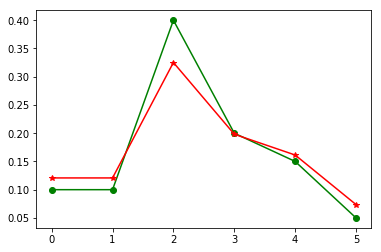

In [38]:
#WE calculate boltzmann distribution if temp is greater than 1 it leads to more diversity that is occurence of all the 
#letters with lower prob increases and higher prob decreases . For boltzmann we use log probabilities .
def temp_sample(probs, temp=1.0):
    probs = np.asarray(probs)
    exp_probs = np.exp(np.log(probs) / temp)
    
    return list(exp_probs / exp_probs.sum())

p = [0.1, 0.1, 0.4, 0.2, 0.15, 0.05]
q = temp_sample(p, 1.4)
#We make two plots to visualize diversity .
plt.plot(p, 'go-')
plt.plot(q, 'r*-')

plt.show()

In [39]:
#We set diversity = 1 by default we can increase it to get more diversity. 
#For generating the next alphabet we first get r a random number btw 0 and 1 then we shuffle the keys that are values
#in context among those values we see their probabilities those value with prob greater than r is returned if such
#a case doesn't happen then we randomly return a shuffled_keys . 
def generate_next(ctx, diversity=1.0):
    r = np.random.random()
    
    possible = T.get(ctx)
    
    if possible is None:
        return ' '
    shuffled_keys = possible.keys()
    random.shuffle(shuffled_keys)
    
    key_probs = [possible[kx] for kx in shuffled_keys]
    
    key_probs = temp_sample(key_probs, temp=diversity)
    
    for kx in range(len(key_probs)):
        if r < key_probs[kx]:
            return shuffled_keys[kx]
    return random.choice(shuffled_keys)

In [40]:
#we make a sentence a string and then randomly initialize a initial state and then generate next 1000 alphabets by
#continously updating ctx (context) . We finally print the sentence that has been generated .
ind = int(np.random.random()*(len(data)-order))
initial_state = data[ind:ind+order]
ctx = initial_state

sentence = '' + ctx

for ix in range(1000):
    nxt = generate_next(ctx, diversity=1.5)
    sentence += nxt
    ctx = sentence[-order:]

print sentence

of it to the left and to the right. one of these had obviously been closed for many weeks. the other belonged to the dining-room, which was the apartment in which the mysterious affair had occurred. holmes walked in, and i followed him with that subdued feeling at my heart which the presence of death inspires.  it was a large square room, looking all the larger from the absence of all furniture. a vulgar flaring paper adorned the walls, but it was blotched in places with mildew, and here and there great strips had become detached and hung down, exposing the yellow plaster beneath. opposite the door was a showy fireplace, surmounted by a mantelpiece of imitation white marble. on one corner of this was stuck the stump of a red wax candle. the solitary window was so dirty that the light was hazy and uncertain, giving a dull grey tinge to everything, which was intensified b                    part i  (being a reprint from the reminiscences of john h. watson, m.d., late of the army medical 

In [41]:
#WEll this is something small extra i just plotted the no. of words having various length . 
#No. of words(having that length) vs length of each word .

In [42]:
#I created a list a in which i have put the alphabets in that word . I have created a list c in which i have appended 
#the list a(having alphabets of the word before ' ') .
a = []
c = []
for i in data:
    if i != ' ':
        a.append(i)
    else :
        c.append(a)
        a = []
#ti is the dictionary 
ti = {}
#In this we have made the length of word as our key and the number of words of that length as its values . where ss is 
#length of the word in the list .
for i in c:
    ss = len(i)
    if ss in ti.keys():
        ti[ss] += 1
    else :
        ti[ss] = 1

In [43]:
ti.values()

[209,
 458,
 1558,
 1651,
 1259,
 880,
 631,
 563,
 408,
 334,
 194,
 118,
 83,
 43,
 18,
 6,
 6,
 4,
 4,
 1,
 1,
 2,
 1]

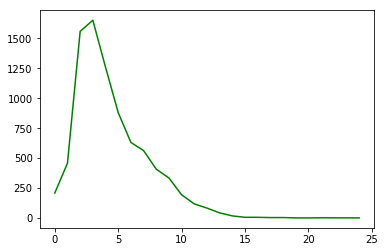

In [44]:
#The plot as expected is gaussian (normal) curve .
plt.plot(ti.keys(), ti.values(), color='g')